In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import itertools
from itertools import cycle

%load_ext autoreload
%autoreload 2

import helpers.helper as helpers
import grading.save_student_results as save_student_results


mpl.rc('figure', max_open_warning = 0)

%matplotlib inline

# Graded Exercise 1

**Date: 30.10.2020**

Welcome to the first graded exercise.

You are asked to fill in the code in a couple of cells throughout the exercise. In the end of each cell, where we ask you to fill in some code, you will notice a call to a function from the `save_student_results` module. This ensures that the body of your function is run with pregenerated data and your current results are saved to a file (which you will eventually submit to the Moodle). The cells are independent of each other and you will receive points for each individual cell. We will not grant partial points within a cell.

Before you finish, please make sure to **upload two files to Moodle**:
* **graded_exercise_1.ipynb**
* **answers_SCIPER.npz (e.g. "answers_280595.npz")**

Good luck! :-)

# Part 1: SVM

### 1.1 Margin Width
SVM tries to maximize the margin between classes. When accounting for potential class overlap, this maximization comes at the cost of allowing the misclassification of some of the data points. In the following exercise, we ask you to find the width (or magnitude) of the margin of a linear SVM for given regularization hyper-parameter C. You can use scikit-learn's SVM functions.

Hint: You can access the dual coefficients and support vectors after fitting from the SVC object. Check the attributes in this documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html . Lecture 4 slide 22 shows how to compute distance of a point to the decision boundary.

In [ ]:
def find_margin_width(X,y,C):
    '''
        X: input data NxD
        y: output label N
        C: scalar value for the regularization term 
        
        return: a scalar width
    '''
    #YOUR CODE HERE 
    
    ########
    
    return width
    
save_student_results.save_find_margin_width(locals())

# Part 2. Classification Metrics
$\renewcommand{\real}{\mathbb{R}}$

In this exercise we will look at some standard means of assessing the quality of binary classifiers, namely the *ROC curve*.

Imagine an apple processing factory which has a very unfortunate location in a war zone. There is a conveyor belt bringing harvested apples inside the factory. However, every now and then, a grenade falls on the conveyor belt. To prevent a disaster in the factory, we deploy an automatic apple/grenade classification system. However, since we are underfunded, we can only afford to measure either the weight or the volume of every item on the conveyor belt (not both at the same time). Therefore, we need to decide if we employ a classifier that takes the weight as input, or one that takes the volume.

We are given a training dataset containing $N$ samples of apples and grenades with their weight and volume measurements. Furthermore, we decide that our final classifier will be a simple threshold on either the weight or the volume of each incoming item. That is 

$$P(x_i == grenade) = \begin{cases} 
      1 & f(x_i) \geq t \\
      0 & \text{otherwise} \\
   \end{cases},
$$

where $f(x_i)$ measures either the weight or the volume of the item $x_i$ and $t \in \real$ is a selected threshold. The implementation of this classifier which you will be using is provided in the cell below.

In [4]:
def class_thresh(X, t):
    """ Classifies 1D data X given a threshold `t`.
    
    Args:
        X (np.array): Data, shape (N, )
        t (float): Threshold.
        
    Returns:
        np.array: Predicted labels, shape (N, ).
    """
    assert X.ndim == 1
    return (X >= t).astype(np.int32)

Now, let us have a look at our dataset. By projecting the data either to the *weight* or *volume* axis, we can immediatelly see that it is not clear at all whether weight or volume is a better indicator of receiving a grenade.

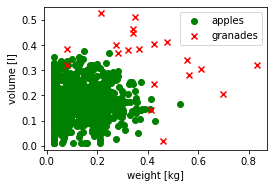

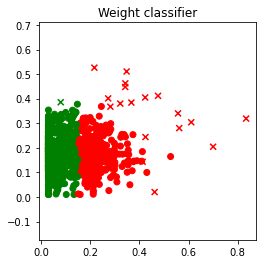

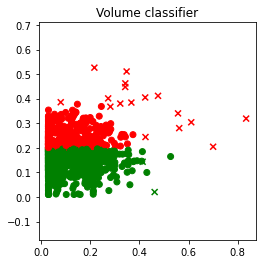

In [5]:
X, y = helpers.generate_apple_grenade_data()
helpers.plot_apple_grenade_data(X, y, class_thresh)

Your task will be to evaluate the simple threshold classifier both for weight and volume features individually to decide, which one can detect granades more reliably. To this end, we will use a technique common for evaluating binary classifiers, the *ROC curve*.

Let the threshold $t$ vary from the minimum to the maximum value (of either weight or volume) in the whole dataset. Generate the ROC  curve. You can use the helper function *plot_roc_curves*, please study its interface.

In [ ]:
#############################################

def true_false_pos_neg(y_gt, y_p):
    """ Computes TP, FP, TN, FN.
    
    Args:
        y_gt (np.array): GT labels, shape (N, ).
        y_p (np.array): Pred. labels, shape (N, ).
        
    Returns:
        floats: TP, FP, TN, FN
    """
    assert y_gt.ndim == 1 and y_p.ndim == 1
    assert y_gt.shape[0] == y_p.shape[0]
    N = y_gt.shape[0]
    
    
    tp = np.sum(np.where(y_gt == 1 & y_p == 1))
    fp = np.sum(np.where(y_gt == 1 & y_p == 0))
    fn = np.sum(np.where(y_gt == 0 & y_p == 1))
    tn = np.sum(np.where(y_gt == 0 & y_p == 0))

    
    
    assert tp + fp + tn + fn == N
    return tp, fp, tn, fn

#############################################
save_student_results.save_true_false_pos_neg(locals())
#############################################

def tp_rate(tp, fp, tn, fn):
    """ Returns true positive rate.
    Note: You may not need to use all the arguments
    
    Args:
        fp (float): number of false positives
        tp (float): number of true positives
        tn (float): number of true negatives
        fn (float): number of false negatives
        
        
    Returns:
        tp_rate (float): TP rate.
    """
    return tp / (fn + tp)

#############################################
save_student_results.save_tp_rate(locals())
#############################################

def fp_rate(tp, fp, tn, fn):
    """ Returns false positive rate.
    Note: You may not need to use all the arguments
    
    Args:
        fp (float): number of false positives
        tp (float): number of true positives
        tn (float): number of true negatives
        fn (float): number of false negatives
        
        
    Returns:
        fp_rate (float): FP rate.
    """
    #YOUR CODE HERE
    return fp / (fp + tn)

#############################################
save_student_results.save_fp_rate(locals())
#############################################

def roc_curve(fcl, x, y, ts):
    """ Computes data for ROC curve.
    
    Args:
        fcl (callable): Classification function.
        x (np.array): Data, shape (N, ).
        y (np.array): Gt labels, shape (N, ).
        t (np.array): Thresholds, shape (T, ).
        
    Returns:
        tp_rates (np.array): TP rates, shape (T, ).
        fp_rates (np.array): FP rates, shape (T, ).
    """
    #YOUR CODE HERE
    np.argsort(probabilities)
    return np.array(tp_rates), np.array(fp_rates)

steps = 1000

#############################################
save_student_results.save_roc_curve(locals())
#############################################

### ROC curve
ts1 = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), steps)
ts2 = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), steps)

helpers.plot_roc_curves(
    *roc_curve(class_thresh, X[:, 0], y, ts1)[::-1], 
    *roc_curve(class_thresh, X[:, 1], y, ts2)[::-1])

#############################################


Looking at the curve, decide which classifier is better and write its name in the variable *final_classifier* below.

In [ ]:
#############################################
# YOUR CODE HERE

final_classifier = ... # 'weight' or 'volume'

#############################################
save_student_results.save_final_classifier(locals())

# Part 3: Multiclass Logistic Regression
$\renewcommand{\real}{\mathbb{R}}$
$\renewcommand{\nonnegint}{\mathbb{N_{0}}}$
$\renewcommand{\xb}{\mathbf{x}}$
$\renewcommand{\wb}{\mathbf{w}}$
$\renewcommand{\Xb}{\mathbf{X}}$
$\renewcommand{\yb}{\mathbf{y}}$
$\renewcommand{\Yb}{\mathbf{Y}}$
$\DeclareMathOperator*{\argmin}{argmin}$

In exercise session 4 you implemented binary logisitc regression. In this exercise we will extend the idea to a logistic regression classifier operating on multiple classes.

Let us consider logistic regression for $C$ classes. The weights are stored in a weight matrix $\mathbf{W}$, where every column is $\wb_{(k)}$ for class $k$. Therefore, for every class $k$, we learn a separate $\wb_{(k)}$ during training. The weight matrix will be of size $((D + 1) \times C)$, where $D$ is dimension of the input ($2$ in our case).

First, let us have a look at the data we are dealing with. We have $N$ samples in $3$ classes. Let $X \in \real^{N \times (D + 1)}$ be the training input matrix, $Y \in \nonnegint^{N \times C}$ be ground-truth labels, and $W \in \real^{D \times C}$ be the weight matrix. Run the cell below to load and plot the data. Each class is denoted by a different marker and color.

As you can see, the classes severly overlap, and thus we cannot expect $100 \%$ accuracy for our trained model, since there is clearly no set of linear decision boundaries which perfectly separates the data.

In [ ]:
### Generate data.

# Settings.
mus = np.array([[0., 0.], [2., 3], [-1., 2.]])
# stds = np.array([[0.5, 0.5], [0.25, 1.], [0.1, 0.5]])
stds = np.array([[0.75, 0.75], [2.5, 1.0], [0.1, 1.5]])
Ns = np.array([100, 150, 200])
C = Ns.shape[0]

# Data.
X, Y = helpers.generate_data(mus, stds, Ns, labels_one_hot=True,
                     bias=True, shuffle=True)
fig = helpers.vis_classes_prediction(X, Y, Y, Ns.shape[0])

We will start with implementing the basic building blocks of the multi-class logistic regression that you saw in class, namely

- the softmax function
- the loss function
- the gradient computation
- the class prediction function.

We prepared the declaration of the corresponding functions below, please implement the bodies of the functions.

In [ ]:
### Logistic regression.

def softmax(X, W):
    """ Computes softmax.
    
    Args:
        X (np.array): Data, shape (N, D), 
            N is # samples, D is dimension.
        W (np.array): Weights, shape (D, C), 
            C is # classes.
            
    Returns:
        np.array: Result of shape (N, C).
    """
    
    #############################################
    # YOUR CODE HERE
    
    return ...

    #############################################

####################
save_student_results.save_softmax(locals())
####################

def loss_logreg(X, Y, W):
    """ Loss function for multi class logistic regression.
    
    Args:
        X (np.array): Input data, shape (N, D).
        Y (np.array): GT labels as one-hot, shape (N, C).
        W (np.array): Weights, shape (D, C).
        
    Returns:
        float: Loss value.
    """
    #############################################
    # YOUR CODE HERE
    
    return ...

    #############################################
    
####################
save_student_results.save_loss_logreg(locals())
####################

def gradient_logreg(X, Y, W):
    """ Gradient function for multi class logistic regression.
    
    Args:
        X (np.array): Input data of shape (N, D).
        Y (np.array): GT labels as one-hot, shape  (N, ).
        W (np.array): Weights, shape (D, C).
        
    Returns:
        np.array: Gradients, shape (D, C).
    """
    
    #############################################
    # YOUR CODE HERE
    
    return ...

    #############################################
    
####################
save_student_results.save_gradient_logreg(locals())
####################
    
def predict_logreg(X, W):
    """ Prediction of a class label (index) per data sample.
    
    Args:
        X (np.array): Input data of shape (N, D).
        W (np.array): Weights, shape (D, C).
        
    Returns:
        np.array: Predicted labels as indices, (N, ).
    """
    
    #############################################
    # YOUR CODE HERE
    
    return ...

    #############################################
    
####################
save_student_results.save_predict_logreg(locals())
####################

Finally, let us train the logistic regression on the given training dataset. We have provided the training code for you. 

Upon successful training, you should see an accuracy of $> \sim85 \%$.

In [ ]:
def train_logreg(X, Y, C, max_iters, lr, print_period=10, plot_period=20):
    """ Training function for multi class logistic regression. 
    
    Args:
        X (np.array): Dataset of shape (N, D).
        Y (np.array): Labels of shape (N, C).
        C (int): Number of classes.
        max_iters (integer): Maximum number of iterations.
        lr (float): The learning rate of  the gradient step.
        print_period (int): Printing period.
        plot_period (int): Plotting period.

    Returns:
        np.array: Learned weights, shape (D, C).
    """
    figs = []
    Yinds = helpers.onehot_to_label(Y)

    # Initialize weights.
    W = np.random.normal(0, 0.1, (X.shape[1], C))  
    
    # Initial prediction.
    acc = helpers.my_accuracy_func(Yinds, predict_logreg(X, W))
    figs.append(helpers.vis_classes_prediction(
        X, Y, predict_logreg(X, W), C, title=f"Iter 0, acc: {acc:.2f}"))
    
    # Train.    
    for it in range(max_iters):

        # Compute the gradient and update the weights.
        gW = gradient_logreg(X, Y, W)
        W -= lr * gW
                
        if print_period and (it + 1) % print_period == 0:
            acc = helpers.my_accuracy_func(Yinds, predict_logreg(X, W))
            loss = loss_logreg(X, Y, W)
            print(f"Iter {it + 1} - loss: {loss:.2f}, acc: {acc:.2f}")
        if plot_period and (it + 1) % plot_period == 0:
            acc = helpers.my_accuracy_func(Yinds, predict_logreg(X, W))
            figs.append(helpers.vis_classes_prediction(
                X, Y, predict_logreg(X, W), C, 
                title=f"Iter {it + 1}, acc: {acc:.2f}"))

    acc = helpers.my_accuracy_func(Yinds, predict_logreg(X, W))
    figs.append(helpers.vis_classes_prediction(
        X, Y, predict_logreg(X, W), C, 
        title=f"Iter {it + 1}, acc: {acc:.2f}"))

    plt.show()
    for f in figs:
        plt.close(f)
    
    return W


# Set max iters. and the learning rate.
max_iters = 100
lr = 0.001

W_star = train_logreg(X, Y, C, max_iters, lr)